In [38]:
import os
import librosa
import numpy as np
from scipy.ndimage import zoom
from sklearn.decomposition import PCA

# .wav 파일이 저장된 폴더
folder_path = './dataset/'

# .wav 파일을 스펙트로그램으로 변환하여 저장할 리스트
spectrograms = []
labels = []

# '0'과 '1' 폴더를 순회
for label in ['0', '1']:
    label_folder_path = os.path.join(folder_path, label)

    # folder_path 내의 모든 파일을 순회
    for file_name in os.listdir(label_folder_path):
        # .wav 파일만 처리
        if file_name.endswith('.wav'):
            # 오디오 파일 읽기
            y, sr = librosa.load(os.path.join(label_folder_path, file_name))

            # 오디오 파일을 스펙트로그램으로 변환
            D = librosa.stft(y)
            spectrogram = librosa.amplitude_to_db(np.abs(D), ref=np.max)

            # 리스트에 스펙트로그램 추가
            spectrograms.append(spectrogram)

            # 레이블 추가
            labels.append(int(label))

# numpy 배열로 변환
X_train = np.array(spectrograms)
y_train = np.array(labels)

X_train = np.expand_dims(X_train, -1)

print(X_train.shape)
print(y_train.shape)



(10000, 1025, 130, 1)
(10000,)


In [40]:
import numpy as np
import librosa
import sounddevice as sd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# 모델 구조 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(1025,130,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train = np.array(spectrograms)
y_train = np.array(labels)

# 차원을 추가하여 모델에 적합한 형태로 만듦
X_train = X_train[..., np.newaxis]

print(X_train.shape)

model.fit(X_train, y_train, epochs=3, batch_size=32)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 1023, 128, 32)     320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 511, 64, 32)      0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 511, 64, 32)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 509, 62, 64)       18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 254, 31, 64)      0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 254, 31, 64)     

2024-01-03 14:49:08.381442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc

313/313 [==============================] - 87s 272ms/step - loss: 0.7298 - accuracy: 0.6864
Epoch 2/3


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

313/313 [==============================] - 87s 277ms/step - loss: 0.5432 - accuracy: 0.6885
Epoch 3/3
313/313 [==============================] - 88s 280ms/step - loss: 0.5409 - accuracy: 0.6884


(1025, 130)


/var/folders/ch/ys765g1d7bj24gvgmhpgwcfc0000gn/T/ipykernel_16894/313457153.py:25: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')


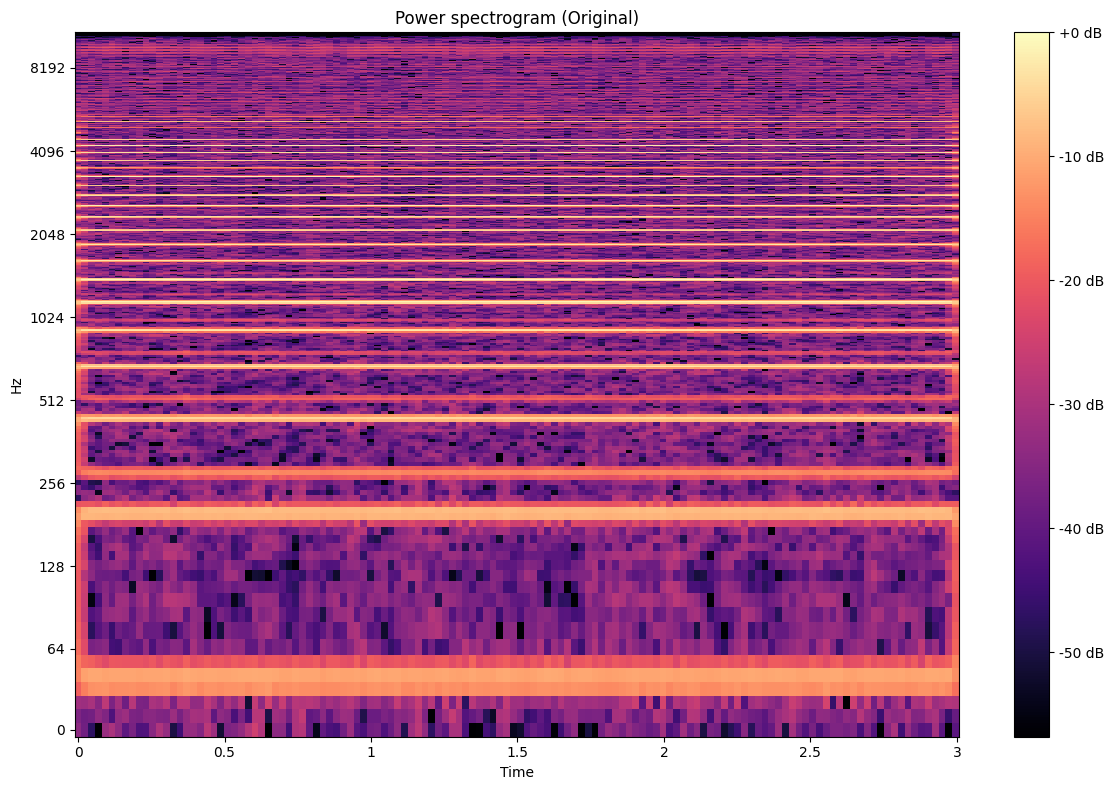

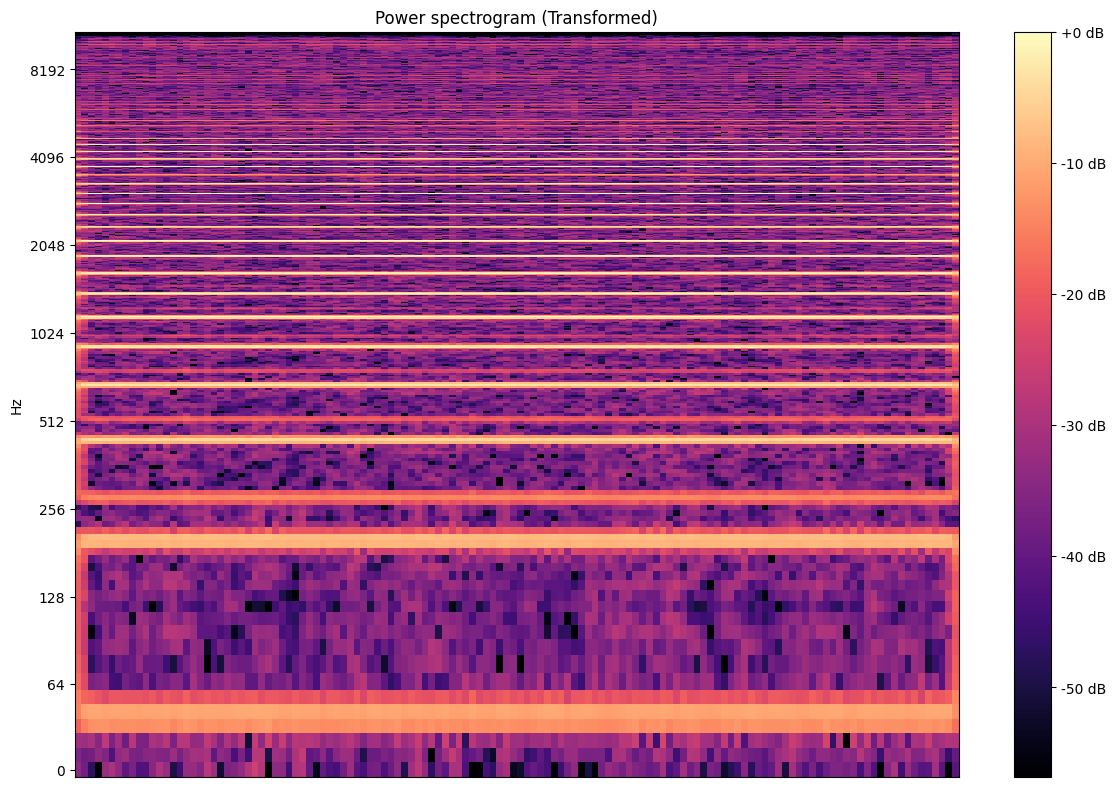

1/1 [==============================] - 0s 11ms/step
[0.]


In [88]:
y, sr = librosa.load('./dataset/1/output_noisy_audio_0.wav')
D = librosa.stft(y)
spectrogram = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# spectrogram = spectrogram[np.newaxis, :, :, np.newaxis]
            

# 푸리에 변환을 실행하여 스펙트로그램을 얻음
# spectrogram = np.abs(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=1025))

print(spectrogram.shape)
t = spectrogram.shape[1]  # spectrogram의 두 번째 차원 크기를 가져옴

# if t < X_train.shape[2]:
#     padding = np.zeros((1025, X_train.shape[2] - t))
#     spectrogram = np.concatenate((spectrogram, padding), axis=1)
# elif t > X_train.shape[2]:
#     # t가 97보다 크면 초과하는 부분을 잘라냄
#     spectrogram = spectrogram[:, :X_train.shape[2]]
import matplotlib.pyplot as plt

# librosa의 stft 함수로 푸리에 변환을 실행
D = librosa.stft(y)
# 아직 스펙트로그램으로 변환하지 않은 원본 데이터 시각화
plt.figure(figsize=(12, 8))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram (Original)')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# 푸리에 변환을 실행하여 스펙트로그램을 얻음
spectrogram = np.abs(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=1025))

# 스펙트로그램으로 변환한 데이터 시각화
plt.figure(figsize=(12, 8))
librosa.display.specshow(spectrogram, y_axis='log')
plt.title('Power spectrogram (Transformed)')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# 푸리에 변환을 실행하여 스펙트로그램을 얻음


spectrogram = spectrogram[np.newaxis, :, :, np.newaxis]  # (1, 1025, 97, 1)

# CNN 모델을 사용하여 스펙트로그램 분석
prediction = model.predict(spectrogram)

print(prediction[0])
# 예측 결과가 0.5 이상이면 '특정 소리 감지됨!' 출력
if prediction[0] >= 0.5:
    print('특정 소리 감지됨!')

In [23]:

def callback(indata, frames, time, status):
    # 푸리에 변환을 실행하여 스펙트로그램을 얻음
    spectrogram = np.abs(librosa.feature.melspectrogram(y=indata[:, 0], sr=44100, n_mels=1025))

    print(spectrogram.shape)  # (1025, t)
    t = spectrogram.shape[1]  # spectrogram의 두 번째 차원 크기를 가져옴

    if t < X_train.shape[2]:
        # t가 97보다 작으면 부족한 부분을 0으로 채움
        padding = np.zeros((1025, X_train.shape[2] - t))
        spectrogram = np.concatenate((spectrogram, padding), axis=1)
    elif t > X_train.shape[2]:
        # t가 97보다 크면 초과하는 부분을 잘라냄
        spectrogram = spectrogram[:, :X_train.shape[2]]

    spectrogram = spectrogram[np.newaxis, :, :, np.newaxis]  # (1, 128, 97, 1)

    # CNN 모델을 사용하여 스펙트로그램 분석
    prediction = model.predict(spectrogram)

    # 예측 결과가 0.5 이상이면 '특정 소리 감지됨!' 출력
    print(prediction[0])
    if prediction[0] >= 0.5:
        print('특정 소리 감지됨!')

# 스트림 개방
stream = sd.InputStream(callback=callback, channels=1, samplerate=44100)
# 스트림 시작
with stream:
    while True:
        pass


(1025, 1)
1/1 [==============================] - 0s 127ms/step
[0.0010784]
(1025, 1)
1/1 [==============================] - 0s 23ms/step
[0.0010784]


KeyboardInterrupt: 